In [1]:
import re

In [2]:
hist={'frac':0,'date or year':0,'dash':0,'normal':0}
def number_handler(token):
    global hist
    num_str = ''
#     m = RE_NUMBER.match(token)
#     m = RE_TOKEN.findall(token)
    m=token
    if m:
        try:
            # remove thousands separator
            num_str = m.replace(',', '') # eg: 1,000 -> 1000
            
            # remove leading zeros
            num_str = num_str.lstrip('0') # eg: 0001 -> 1   
            if num_str == '':  #eg: 0000 -> 0  
                num_str = '0'
            else:
                if num_str[0] == '.': # eg: 000.1 -> .1  -> 0.1
                    num_str = '0' + num_str
            
            # remove excessive 0 at end of float number
            if '.' in num_str: # eg: 0.100-> 0.1  1.100->1.1 
                num_str = str(float(num_str))
                hist['frac']+=1
            # special case        
            elif '/' in num_str: # date or frac
                num_str=number_handler_help_slash(token)
                if type(num_str) is list:
                    hist['date or year']+=1
                else:
                    hist['frac']+=1
            elif num_str.find('-',1)>=0: # eg: i-386
                num_str=number_handler_help_hyphen(token)
                hist['dash']+=1
            else:
                 hist['normal']+=1
        except ValueError:
            num_str = ''
            print("error--unknown format when handling number:", token)
    return num_str

def number_handler_help_slash(token):
    if '/' not in token: # sanity check
        return ''
    tmp=token.split('/')
    # handle date, caveate: only yyyy/mm/dd or yyyy/mm  format
    year_low=1000
    year_up=2025
    month_low=1
    month_up=12
    day_low=1
    day_up=31
    try:
        if '' in tmp: # ambiguous case: /07 or 2018/
            raise ValueError
        if len(tmp)==2: # yyyy/mm or frac
            tmp0=int(tmp[0])
            tmp1=int(tmp[1])
            if tmp0>year_low and tmp0<year_up and tmp1>month_low and tmp1<month_up: # valid date format
                return [str(tmp0),'/',str(tmp1)]
            else: # frac likely
                return str(float("{0:.4f}".format(tmp0/tmp1)))
        if len(tmp)==3: # yyy/mm/dd
            tmp0=int(tmp[0])
            tmp1=int(tmp[1])
            tmp2=int(tmp[2])
            if tmp0>year_low and tmp0<year_up and tmp1>month_low and tmp1<month_up and tmp2>day_low and tmp2<day_up:# valid date format
                return [str(tmp0),'/',str(tmp1),'/',str(tmp2)]
            else:
                raise ValueError
    except:
        print('error--unknown format when handling slash:',token)
        return ''
def number_handler_help_hyphen(token):
    if '-' not in token: # sanity check
        return ''
    tmp=token.split('-')
    res=[]
    for i, element in enumerate(tmp):
        if i ==len(tmp)-1:
            res.append(element)
        else:
            res.append(element)
            res.append('-')
    return res

In [267]:
fout=open('../../data/wikipedia/enwiki_numerals_processed','a+',encoding='utf-8')
count=0
path = '../../data/wikipedia/enwiki-latest-small-p10p30302-with-frac-numerals-1'
fin=open(path, 'r', encoding='utf-8')
data_for_SOM=[]
for line in fin.readlines():
    count+=1
    if count>5:
        break
    tokens=line.split()
    for token in tokens:
        target=token
        res=re.findall(RE_NUM, token)
        if res !=[]:
            target=number_handler(token)
            print("Got numerals:", token, "    changed to: ", target)
            if type(target) is list:
                fout.write(' '.join(target)+' ')
                data_for_SOM+=[i for i in target if i.isdigit()]
            else: 
                fout.write(target+' ')
                if float(target)>1000 and float(target)<2025:
                    hist['date or year']+=1
                data_for_SOM.append(target)
        else:
            fout.write(target+' ')
    

fout.close()

Got numerals: 1539     changed to:  1539
Got numerals: 1890     changed to:  1890
Got numerals: 17     changed to:  17
Got numerals: 1642     changed to:  1642
Got numerals: 19     changed to:  19
Got numerals: 1790     changed to:  1790
Got numerals: 1793     changed to:  1793
Got numerals: 1840     changed to:  1840
Got numerals: 1844     changed to:  1844
Got numerals: 1848     changed to:  1848
Got numerals: 1848     changed to:  1848
Got numerals: 1845     changed to:  1845
Got numerals: 1873     changed to:  1873
Got numerals: 1870     changed to:  1870
Got numerals: 1860     changed to:  1860
Got numerals: 1873     changed to:  1873
Got numerals: 1864     changed to:  1864
Got numerals: 1868     changed to:  1868
Got numerals: 1870     changed to:  1870
Got numerals: 1871     changed to:  1871
Got numerals: 1872     changed to:  1872
Got numerals: 18     changed to:  18
Got numerals: 28     changed to:  28
Got numerals: 28     changed to:  28
Got numerals: 1871     changed to:  

Got numerals: 2000     changed to:  2000
Got numerals: 2016     changed to:  2016
Got numerals: 2010     changed to:  2010
Got numerals: 1,361,299     changed to:  1361299
Got numerals: 1,302,283     changed to:  1302283
Got numerals: 954,228     changed to:  954228
Got numerals: 923,460     changed to:  923460
Got numerals: 768,033     changed to:  768033
Got numerals: 664,441     changed to:  664441
Got numerals: 623,399     changed to:  623399
Got numerals: 595,257     changed to:  595257
Got numerals: 501,589     changed to:  501589
Got numerals: 469,327     changed to:  469327
Got numerals: 248,286     changed to:  248286
Got numerals: 245,838     changed to:  245838
Got numerals: 2016     changed to:  2016
Got numerals: 2010     changed to:  2010
Got numerals: 1,147,417     changed to:  1147417
Got numerals: 1,128,047     changed to:  1128047
Got numerals: 449,720     changed to:  449720
Got numerals: 417,593     changed to:  417593
Got numerals: 414,836     changed to:  414836
G

In [3]:
RE_NUM = re.compile(r"(((-?\d+(,\d{3})*(\.\d+)?)\/(-?\d+(,\d{3})*(\.\d+)?))|(-?\d+(,\d{3})*(\.\d+)?))", re.UNICODE)

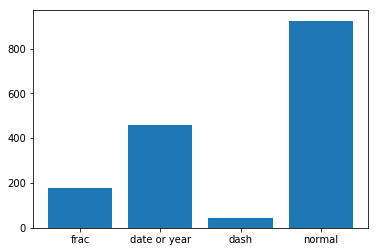

{'frac': 178, 'date or year': 459, 'dash': 45, 'normal': 924}


In [277]:

import matplotlib.pyplot as plt

plt.bar(range(4), [hist.get(n, 0) for n in hist.keys()], align='center',yerr=0.000001)
plt.xticks(range(4), hist.keys())
plt.show()
print(hist)

In [4]:
print(number_handler('03/12'))
print(number_handler('3/12'))
print(number_handler('1987/03'))
print(number_handler('1987/03/12'))
print(number_handler('187/03/12'))
print(number_handler('u-32'))
print(number_handler('-32.000'))
print(number_handler('32'))
print(number_handler('i32'))

0.25
0.25
['1987', '/', '3']
['1987', '/', '3', '/', '12']
error--unknown format when handling slash: 187/03/12

['u', '-', '32']
-32.0
32
i32
